# Ridge VS Lasso tackling Overfitting and Underfitting

Ridge Regression
Ridge regression adds a penalty term proportional to the square of the magnitude of coefficients to the cost function. The objective function for Ridge regression is:
<img src="../Markdown_images/Screenshot 2024-05-24 142126.png">


Intercept: 3.691721254340036
Coefficient: 2.932375952324094


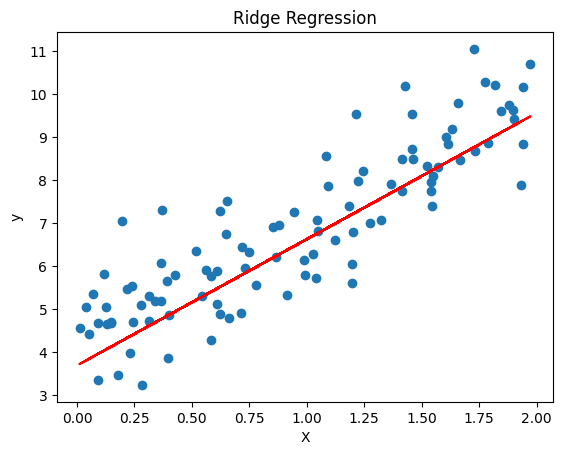

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance

# Implement Ridge regression
def ridge_regression(X, y, alpha=0.1, n_iterations=1000, learning_rate=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Random initialization of theta
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y) + 2 * alpha * theta
        theta = theta - learning_rate * gradients
    return theta

# Run Ridge regression
theta_ridge = ridge_regression(X_b, y)

# Print the parameters
print("Intercept:", theta_ridge[0][0])
print("Coefficient:", theta_ridge[1][0])

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_ridge), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression")
plt.show()

Lasso Regression
Lasso regression adds a penalty term proportional to the absolute value of coefficients to the cost function. The objective function for Lasso regression is:
<img src="../Markdown_images/Lasso.png">
where 
𝛼
α is the regularization parameter.

Implementing Lasso regression is similar to Ridge regression, but you need to compute the gradient of the absolute value of coefficients and update the parameters accordingly.

Intercept: 4.090713107031698
Coefficient: 2.834345564471544


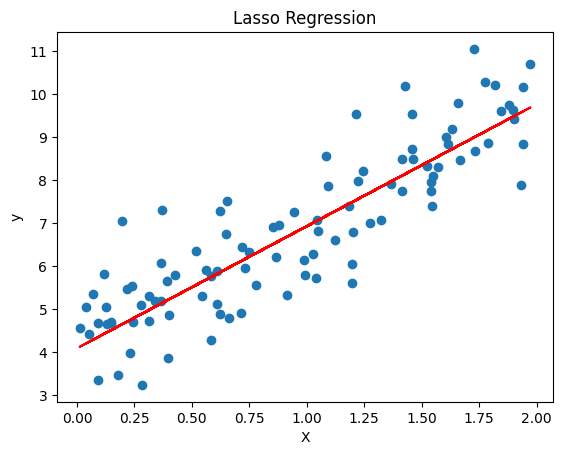

In [2]:
# Implement Lasso regression
def lasso_regression(X, y, alpha=0.1, n_iterations=1000, learning_rate=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Random initialization of theta
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y) + alpha * np.sign(theta)
        theta = theta - learning_rate * gradients
    return theta

# Run Lasso regression
theta_lasso = lasso_regression(X_b, y)

# Print the parameters
print("Intercept:", theta_lasso[0][0])
print("Coefficient:", theta_lasso[1][0])

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_lasso), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Lasso Regression")
plt.show()